# 🧪 TP – Analyse des performances d’étudiants

🎯 **Objectif :** Préparer ce dataset pour un prochain cours qui prédira la note finale d’un étudiant.

### Jeu de données : StudentsPerformance.csv
### Réponder aux questions dans la cellule suivant la question
### Modules autorisés : pandas, mathplotlib, numpy, seaborn, scikit-learn

## 📋 Questions

### 🔹 0. charger le jeu de données et ajout de colonne average_score

a. Charger le jeu de données et puis ajouter une colonne 'average_score' (moyenne des trois notes "math score","reading score","writing score" dans le jeu de données

In [175]:
import pandas as pd

data = pd.read_csv('8_StudentsPerformance.csv')

data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)

### 🔹 1. Exploration de base

a. Charger le jeu de données et Afficher les 10 premières lignes du dataset

In [159]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0,72.666667
1,female,group C,some college,standard,completed,69,90.0,88.0,82.333333
2,female,group B,master's degree,standard,none,90,95.0,93.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0,49.333333
4,male,group C,some college,standard,none,76,78.0,75.0,76.333333
5,female,group B,associate's degree,standard,none,71,83.0,78.0,77.333333
6,female,group B,some college,standard,completed,88,95.0,92.0,91.666667
7,male,group B,some college,free/reduced,none,40,43.0,39.0,40.666667
8,male,group D,high school,free/reduced,completed,64,64.0,67.0,65.000000
9,female,group B,high school,free/reduced,none,38,60.0,50.0,49.333333


b. Combien d’étudiants ont participé à l’étude ?

In [160]:
data.shape[0]

1002

c. Existe-t-il des doublons (étudiants) ?

In [161]:
if True in data.duplicated():
    print("OUI")
else:
    print("NON")


NON


d. Donner les statistiques de base des scores (max, min, moyenne, mediane)

In [162]:
stats = data.describe()

print(f" max : {stats.loc['max']}")
print(f" min : {stats.loc['min']}")
print(f" moyenne : {stats.loc['mean']}")
print(f" mediane : {stats.loc['50%']}")



 max : math score       100.0
reading score    100.0
writing score    100.0
average_score    100.0
Name: max, dtype: float64
 min : math score        0.0
reading score    17.0
writing score    10.0
average_score     9.0
Name: min, dtype: float64
 moyenne : math score       66.110778
reading score    69.185814
writing score    68.071928
average_score    67.795077
Name: mean, dtype: float64
 mediane : math score       66.000000
reading score    70.000000
writing score    69.000000
average_score    68.333333
Name: 50%, dtype: float64


### 🔹 2. Détection de valeurs manquantes ou incohérentes

a. Nombre de valeurs manquantes par cellule?

In [163]:
data.isna().sum()

gender                         1
race/ethnicity                 2
parental level of education    0
lunch                          0
test preparation course        2
math score                     0
reading score                  1
writing score                  1
average_score                  0
dtype: int64

b. Combien d'étudiants ont un score moyen < 40 ?

In [164]:
data[data['average_score']<40].shape[0]

30

c. Valeurs aberrantes pour le score moyen ? (utiliser visualisation et la Méthode de l’écart interquartile [à lire])

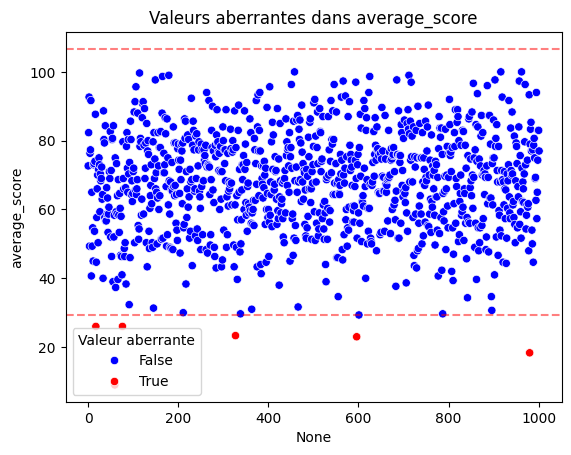

In [165]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def marquer_valeurs_aberrantes(df, colonne, seuil=1.5):
    # q1 = df[colonne].quantile(0.25)
    # q3 = df[colonne].quantile(0.75)
    q1 = np.percentile(df[colonne], 25)
    q3 = np.percentile(df[colonne], 75)
    iqr = q3 - q1
    limite_basse = q1 - seuil * iqr
    limite_haute = q3 + seuil * iqr
    
    # plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.index, y=df[colonne], 
                   hue=((df[colonne] < limite_basse) | (df[colonne] > limite_haute)),
                   palette={True: 'red', False: 'blue'})
    plt.axhline(limite_basse, color='r', linestyle='--', alpha=0.5)
    plt.axhline(limite_haute, color='r', linestyle='--', alpha=0.5)
    plt.title(f'Valeurs aberrantes dans {colonne}')
    plt.legend(title='Valeur aberrante')
    plt.show()

# Exemple d'utilisation
marquer_valeurs_aberrantes(data, 'average_score')

### 🔹 3. Visualisation des données

a. Histogramme des notes moyennes

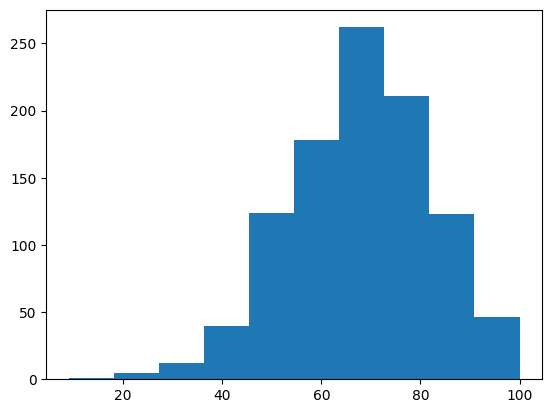

In [166]:
plt.hist(data['average_score'])
plt.show()

b. Peut-on voir sur cet histogramme des valeurs abérrantes?

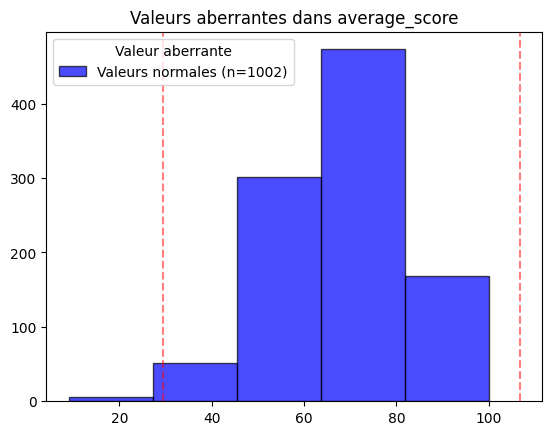

In [167]:
def marquer_valeurs_aberrantes_histogramme(df, colonne, seuil=1.5):
    # q1 = df[colonne].quantile(0.25)
    # q3 = df[colonne].quantile(0.75)
    q1 = np.percentile(df[colonne], 25)
    q3 = np.percentile(df[colonne], 75)
    iqr = q3 - q1
    limite_basse = q1 - seuil * iqr
    limite_haute = q3 + seuil * iqr
    
    # plt.figure(figsize=(10, 6))
    plt.hist(df[colonne], bins=5, color='blue', edgecolor='black', alpha=0.7, 
             label=f'Valeurs normales (n={len(df[colonne])})')
    
    plt.axvline(limite_basse, color='r', linestyle='--', alpha=0.5)
    plt.axvline(limite_haute, color='r', linestyle='--', alpha=0.5)
    plt.title(f'Valeurs aberrantes dans {colonne}')
    plt.legend(title='Valeur aberrante')
    plt.show()

marquer_valeurs_aberrantes_histogramme(data, 'average_score')

c. Faire une boxplot des moyennes par genre.

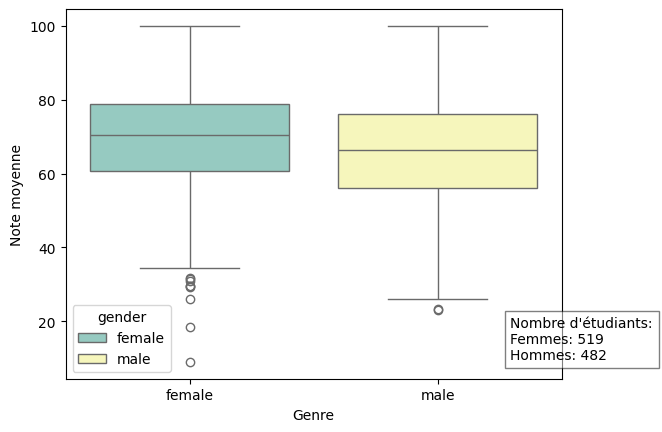

In [168]:
sns.boxplot(x='gender', y='average_score', data=data , palette='Set3', hue='gender')
plt.xlabel('Genre')
plt.ylabel('Note moyenne')

plt.figtext(0.82, 0.15, 
           f"Nombre d'étudiants:\n"
           f"Femmes: {data[data['gender']=='female'].shape[0]}\n"
           f"Hommes: {data[data['gender']=='male'].shape[0]}",
           bbox=dict(facecolor='white', alpha=0.5))

plt.show()

d. Est-ce qu'il y a une différence nette des moyennes de genre sur ce boxplot? 

e. Barplot moyenne par niveau d'éducation des parents? Peut-on avoir des conclusions sur cette variable?

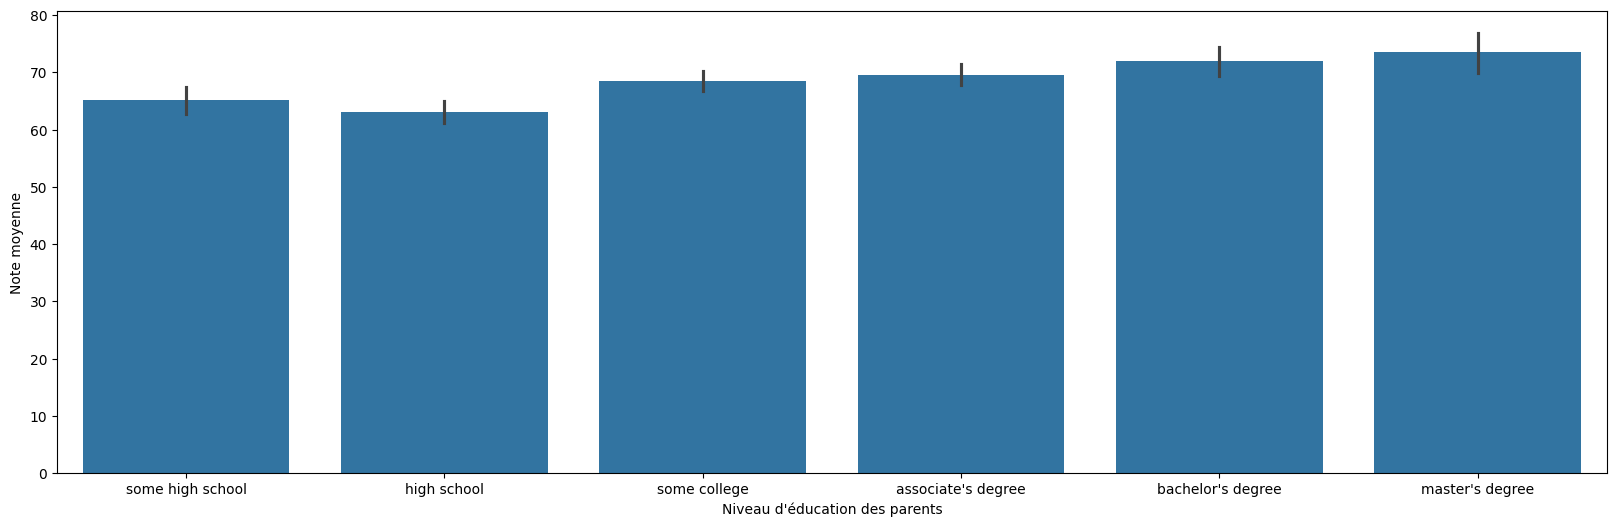

In [169]:
plt.figure(figsize=(20, 6))
sns.barplot(x='parental level of education', y='average_score', data=data.sort_values('average_score', axis=0))
plt.ylabel('Note moyenne')
plt.xlabel('Niveau d\'éducation des parents')
plt.show()

d. Faire le Heatmap de corrélation. Quelle est la variable la plus correlée avec la note moyenne?

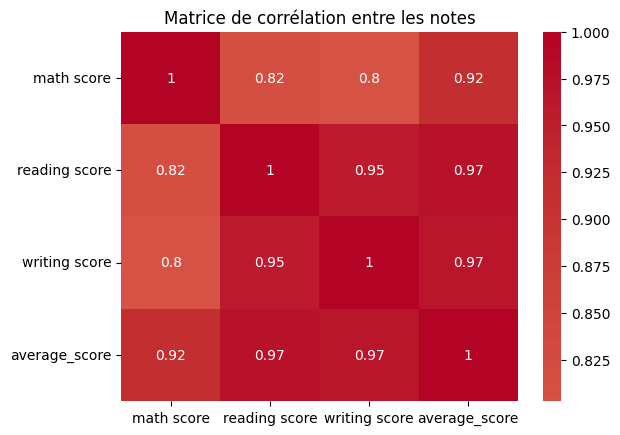

Correlation sorted by 'average_score':
average_score    1.000000
reading score    0.970364
writing score    0.965704
math score       0.918788
Name: average_score, dtype: float64


In [170]:
list_header_numeric = ["math score", "reading score", "writing score", "average_score"]
correlation = data[list_header_numeric].corr()

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation entre les notes')
plt.show()

# Sorted correlations - example: sort by average_score
print("Correlation sorted by 'average_score':")
print(correlation['average_score'].sort_values(ascending=False))

### 🔹 4. Nettoyage des données

a. Imputation des NaN (remplacer les NaN par la moyenne de la variable correspondante)

In [171]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['race/ethnicity'] = data['race/ethnicity'].fillna(data['race/ethnicity'].mode()[0])
data['parental level of education'] = data['parental level of education'].fillna(data['parental level of education'].mode()[0])
data['lunch'] = data['lunch'].fillna(data['lunch'].mode()[0])
data['test preparation course'] = data['test preparation course'].fillna(data['test preparation course'].mode()[0])
data['math score'] = data['math score'].fillna(data['math score'].mean())
data['reading score'] = data['reading score'].fillna(data['reading score'].mean())
data['writing score'] = data['writing score'].fillna(data['writing score'].mean())
data.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64

b. Suppression des colonnes inutiles ( Identifiez les colonnes qui sont redondantes, constantes ou sans valeur explicative[aucune corrélation] )

c. Sélection des colonnes utiles

### 🔹 5. Encodage

a. Encodage de `gender` ( rendre en numérqieu de façon catégorielle )

In [172]:
## encodage de gender
data['gender'] = data['gender'].map({'female': 0, 'male': 1})

b. Encodage one-hot de `parental_level_of_education`

In [173]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# import pandas as pd

# # Liste des colonnes catégorielles à encoder
# categorical_features = ['parental level of education']

# # Création de l'encodeur
# encoder = OneHotEncoder(drop='first', sparse_output=False) 

# # Application de l'encodage
# encoded_data = encoder.fit_transform(data[categorical_features])

# # Transformation en DataFrame pour lisibilité
# encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# # Fusionner avec le dataset original (en retirant la colonne d'origine)
# data = data.drop(columns=categorical_features)
# data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# # Affichage final
# print(data.head())


c. Est-il utilise pour l'encodage de `parental_level_of_education` de faire un Regroupement des modalités ? 

In [174]:
Non

NameError: name 'Non' is not defined

### 🔹 6. Préparation finale

a. Créer X (features) et y (cible: average_score)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# X =  data.drop(columns=['average_score'], axis=1)
# y = data['average_score']

# # Initialisation du label encoder
# le = LabelEncoder()

# categorical_cols = ['race/ethnicity', 'lunch', 'test preparation course']

# for col in categorical_cols:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])


# print(data[['race/ethnicity', 'lunch', 'test preparation course']].head())


   race/ethnicity  lunch  test preparation course
0               1      1                        1
1               2      1                        0
2               1      1                        1
3               0      0                        1
4               2      1                        1


b. Vérifier que X est bien numérique

In [ ]:
# vérifier que X est numérique
# data.select_dtypes(exclude=['int64', 'float64']).columns

Index([], dtype='object')

c. Sauvegarder X et y

In [ ]:
X

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_encoded
0,0,1,1,1,72,72.000000,74.000000,1.0,0.0,0.0,0.0,0.0,1
1,0,2,1,0,69,90.000000,88.000000,0.0,0.0,0.0,1.0,0.0,2
2,0,1,1,1,90,95.000000,93.000000,0.0,0.0,1.0,0.0,0.0,1
3,1,0,0,1,47,57.000000,44.000000,0.0,0.0,0.0,0.0,0.0,0
4,1,2,1,1,76,78.000000,75.000000,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0,2,0,0,59,71.000000,65.000000,0.0,1.0,0.0,0.0,0.0,2
998,0,3,1,0,68,78.000000,77.000000,0.0,0.0,0.0,1.0,0.0,3
999,0,3,0,1,77,86.000000,86.000000,0.0,0.0,0.0,1.0,0.0,3
1000,0,2,0,1,77,86.000000,86.000000,0.0,0.0,0.0,1.0,0.0,2


## 💡 Bonus

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

def preprocess_students_data(df, target_column, type_encodage='label-encodeur', categorical_cols=[]):
    # Séparation X et y
    X = df.drop(columns=[target_column])
    y = df[target_column]

    if categorical_cols is None:
        categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

    if type_encodage == 'label-encodeur':
        # Label encoding sur chaque colonne catégorielle
        for col in categorical_cols:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    elif type_encodage == 'one-hot-encoding':
        # One-hot encoding
        encoder = OneHotEncoder(drop='first', sparse_output=False)

        # Encoder uniquement les colonnes catégorielles
        encoded_data = encoder.fit_transform(X[categorical_cols])

        # Colonnes encodées avec noms
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

        # Supprimer colonnes originales catégorielles
        X = X.drop(columns=categorical_cols)

        # Ajouter colonnes encodées
        X = pd.concat([X, encoded_df], axis=1)

    else:
        raise ValueError("type_encodage doit être 'label-encodeur' ou 'one-hot-encoding'")

    return X, y

# data
X1 , y1 = preprocess_students_data(data, 'average_score', 'label-encodeur',['gender','race/ethnicity','parental level of education','lunch','test preparation course'])

In [ ]:
X1

,math score,reading score,writing score,gender_1,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72.000000,74.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,69,90.000000,88.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,90,95.000000,93.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,47,57.000000,44.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,76,78.000000,75.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,59,71.000000,65.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,68,78.000000,77.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
999,77,86.000000,86.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1000,77,86.000000,86.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


a. Visualisation libre d'une tendance surprenante